In [533]:
import math
import mpmath 
import numpy as np
import matplotlib.pyplot as plt

In [359]:
def sieve(n):
    #Generate the primes p ≤ n using the sieve of Eratosthenes.
    primes, sieve = [], [True] * (n + 1)
    for p in range(2, n + 1):
        if sieve[p]:
            primes.append(p)
            for i in range(p * p, n + 1, p):
                sieve[i] = False
    return primes


def pilist(n):
    #Calculate pi(x), for all 1 ≤ x ≤ n.
    p = sieve(n)
    r = []
    i = 0
    k = 0
    for x in range(1,n+1):
        if i<len(p): 
            if x == p[i]:
                i+=1
                k+=1
        r.append(k)            
    return r

def thetalist(n):
    #Calculate theta(x), for all 1 ≤ x ≤ n.
    p = sieve(n)
    r = []
    i = 0
    k = 0
    for x in range(1,n+1):
        if i<len(p):
            if x == p[i]:
                i+=1
                k+=np.log(x)
        r.append(k)
    return r

def psilist(n):
    #Calculate psi(x), for all 1 ≤ x ≤ n.
    primep, sieve = [0]*n, [True] * (n + 1)
    for p in range(2, n + 1):
        if sieve[p]:
            primep[p-1] = p
            for i in range(p * p, n + 1, p):
                sieve[i] = False
            q = p*p
            while q <= n + 1:
                primep[q-1] = p
                q *= p
    k = 0
    for i in range(n):
        if primep[i] > 0:
            k+=np.log(primep[i])
        primep[i] = k
    return primep

In [361]:
def tlist(n):
    #List of T(x)=log(x!), for all 1 ≤ x ≤ n.
    p = []
    k = 0
    for i in range(1,n+1):
        k += np.log(i)
        p.append(k)
    return p    

def stir1(x):
    #Stirling's lower bound on T(x)
    return (x-.5)*np.log(x)-x+.5*np.log(2*np.pi)

def stir2(x):
    #Stirling's upper bound on T(x)
    return (x+.5)*np.log(x)-x+.5*np.log(2*np.pi)+1/(12*x)

def mstir1(x):
    #Lower bound on T(x)
    return (x-.5)*np.log(x)-x+7./8

def mstir2(x):
    #Upper bound on T(x)
    return (x+.5)*np.log(x)-x+1

def flist(n):
    #List of F(x), for all 1 ≤ x ≤ n.
    t = tlist(n)
    return [t[i-1]+t[max(0,i/30-1)]-t[max(0,i/2-1)]-t[max(0,i/3-1)]-t[max(0,i/5-1)] for i in range(1,n+1)]

Aconst = .5*np.log(2)+np.log(3)/3+np.log(5)/5-np.log(30)/30
Lconst = 1.25/np.log(6)

def fstir1(x):
    #Lower bound on F(x)
    return Aconst*x - 2.5*np.log(x) - 1
    
def fstir2(x):
    #Upper bound on F(x)
    return Aconst*x + 2.5*np.log(x)

def psistir1(x):
    #Lower bound on psi(x)
    return fstir1(x)
    
def psistir2(x):
    #Upper bound on psi(x)
    return 1.2*Aconst*x + np.log(x)*(1.25+Lconst*np.log(x))

def ftmp(x):
    #f(x)
    return 1.2*Aconst*x + np.log(x)*(1.25+Lconst*np.log(x))

def thestir1(x):
    #Lower bound on psi(x)
    return Aconst*x - 2.4*Aconst*np.sqrt(x) - np.log(x)*(3.75+.5*Lconst*np.log(x)) - 1
    
def thestir2(x):
    #Upper bound on psi(x)
    return 1.2*Aconst*x - Aconst*np.sqrt(x) + np.log(x)*(2.5+Lconst*np.log(x)) + 1

In [434]:
ALconst = 25/(16*Aconst*np.log(6))
Bconst = 125/(24*Aconst)
Cconst = 5/(3*Aconst)

def berf(x):
    #returns y such that there is a prime p with y < p ≤ x
    return 5*x/6-2*np.sqrt(x)-np.log(x)*(ALconst*np.log(x)+Bconst)-Cconst

def cheb1(x):
    #Chebyshev's lower bound for pi(x)
    r = 1
    for i in range(3,int(x)):
        r += (thestir1(i)-thestir1(i-1))/np.log(i)
    return r

def cheb2(x):
    #Chebyshev's upper bound for pi(x)
    r = 1
    for i in range(3,int(x)):
        r += (thestir2(i)-thestir2(i-1))/np.log(i)
    return r

In [730]:
#the number of primes up to 10,100,...,10^27
pi10=[4,25,168,1229,9592,78498,664579,5761455,50847534,455052511,4118054813,37607912018,346065536839,
      3204941750802,29844570422669,279238341033925,2623557157654233,24739954287740860,234057667276344607,
      2220819602560918840,21127269486018731928,201467286689315906290,1925320391606803968923,
      18435599767349200867866,176846309399143769411680,1699246750872437141327603,16352460426841680446427399]

#Legendre's approximation of pi(x)
def pileg(x):
    return x/(math.log(x)-1.08366)

#Legendre's improved approximation of pi(x)
def pileg1(x):
    return x/(math.log(x)-1)

#Gauss' first approximation of pi(x)
def pigauss(x):
    return x/math.log(x)

#Gauss' Li(x) approximation of pi(x)
li2=mpmath.li(2)
def pili(x):
    return mpmath.li(x)-li2

In [72]:
sieve(9)

[2, 3, 5, 7]

In [74]:
pilist(6)

[0, 1, 2, 2, 3, 3]

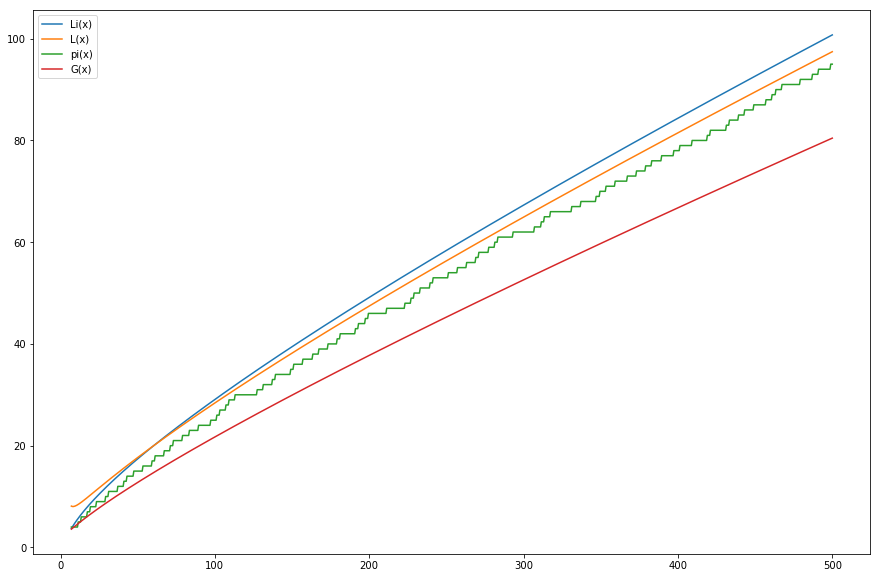

In [732]:
n=500
xres=np.linspace(7,n,1000)
pil=pilist(n)
plt.figure(figsize=(15,10))
plt.plot(xres,[pili(x) for x in xres],label='Li(x)')
plt.plot(xres,[pileg(x) for x in xres],label='L(x)')
#plt.plot(xres,[pileg1(x) for x in xres],label='L1(x)')
plt.plot(xres,[pil[int(x-1)] for x in xres],label='pi(x)')
plt.plot(xres,[pigauss(x) for x in xres],label='G(x)')
plt.legend()
#plt.savefig("pnt.png", dpi=200)
plt.show()

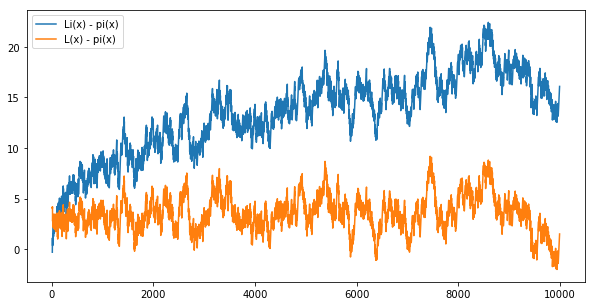

In [541]:
n=10000
li2=mpmath.li(2)
xres=range(7,n+1)
pc=pilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[pili(x)-pc[x-1] for x in xres],label='Li(x) - pi(x)')
plt.plot(xres,[pileg(x)-pc[x-1] for x in xres],label='L(x) - pi(x)')
plt.legend()
plt.show()

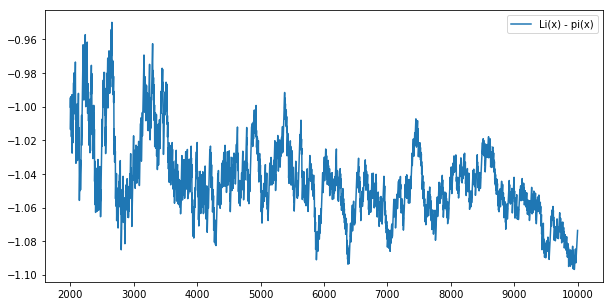

In [606]:
n=10000
xres=range(2000,n+1)
pc=pilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[float(x)/pc[x-1]-math.log(x) for x in xres],label='Li(x) - pi(x)')
plt.legend()
plt.show()

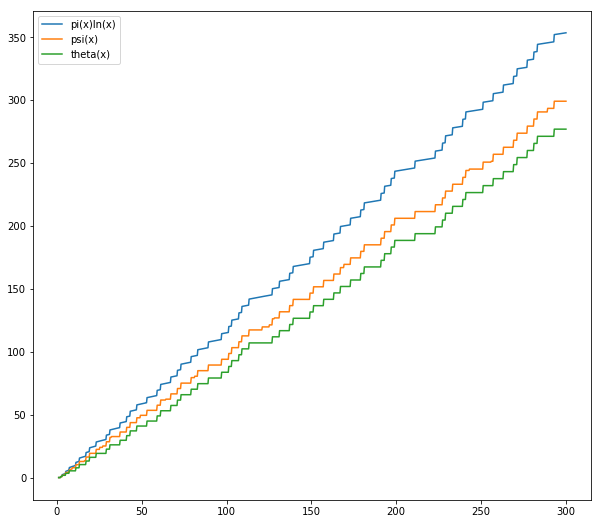

In [845]:
n=300
xres=np.linspace(1,n,1000)
theta=thetalist(n)
psi=psilist(n)
pil=pilist(n)
plt.figure(figsize=(10,9))
plt.plot(xres,[pil[int(x-1)]*np.log(x) for x in xres],label='pi(x)ln(x)')
plt.plot(xres,[psi[int(x-1)] for x in xres],label='psi(x)')
plt.plot(xres,[theta[int(x-1)] for x in xres],label='theta(x)')
#plt.plot(xres,xres,label='x')
plt.legend()
#plt.savefig("psitheta.png", dpi=200)
plt.show()

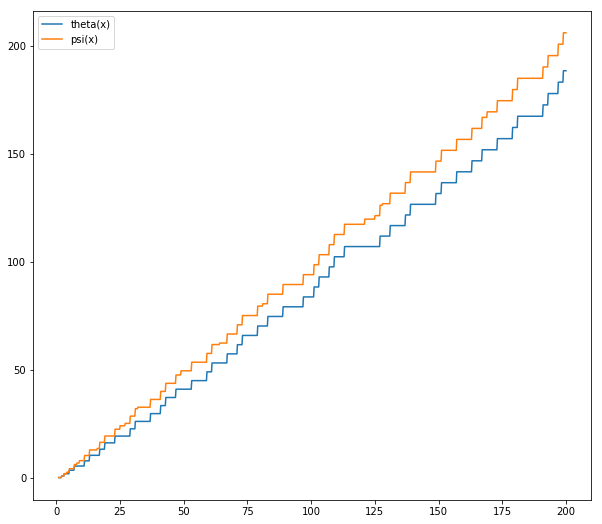

In [822]:
n=200
xres=np.linspace(1,n,1000)
theta=thetalist(n)
psi=psilist(n)
pil=pilist(n)
plt.figure(figsize=(10,9))
plt.plot(xres,[theta[int(x-1)] for x in xres],label='theta(x)')
plt.plot(xres,[psi[int(x-1)] for x in xres],label='psi(x)')
#plt.plot(xres,[pil[int(x-1)]*np.log(x) for x in xres],label='pi(x)log(x)')
#plt.plot(xres,xres,label='x')
plt.legend()
#plt.savefig("psitheta1.png", dpi=200)
plt.show()

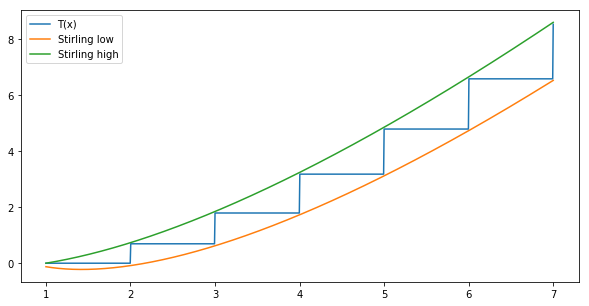

In [301]:
n=7
xres=np.linspace(1,n,1000)
t=tlist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[t[int(x-1)] for x in xres],label='T(x)')
plt.plot(xres,[mstir1(x) for x in xres],label='Stirling low')
plt.plot(xres,[mstir2(x) for x in xres],label='Stirling high')
plt.legend()
plt.show()

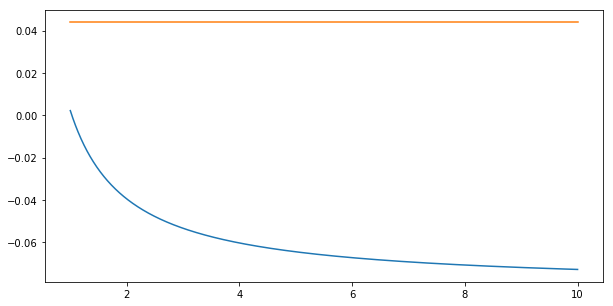

In [302]:
n=10
xres=np.linspace(1,n,1000)
t=tlist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[stir2(x)-mstir2(x) for x in xres])
plt.plot(xres,[stir1(x)-mstir1(x) for x in xres])
plt.legend()
plt.show()

In [303]:
.5*np.log(2*np.pi)-7./8

0.04393853320467267

In [305]:
.5*np.log(2*np.pi)-1.5*(1-np.log(1.5))

0.027136195366919247

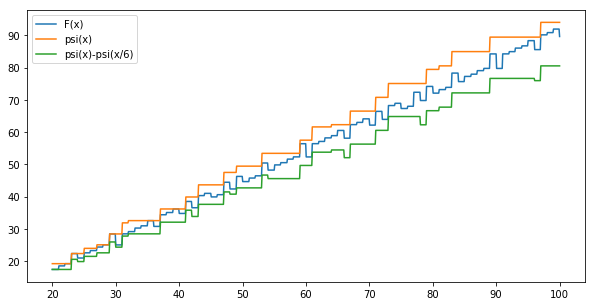

In [216]:
n=100
xres=np.linspace(20,n,1000)
f=flist(n)
psi=psilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[f[int(x)-1] for x in xres],label='F(x)')
plt.plot(xres,[psi[int(x)-1] for x in xres],label='psi(x)')
plt.plot(xres,[psi[int(x)-1]-psi[max(0,int(x/6)-1)] for x in xres],label='psi(x)-psi(x/6)')
#plt.plot(xres,xres,label='x')
plt.legend()
#plt.savefig("f.png", dpi=150)
plt.show()

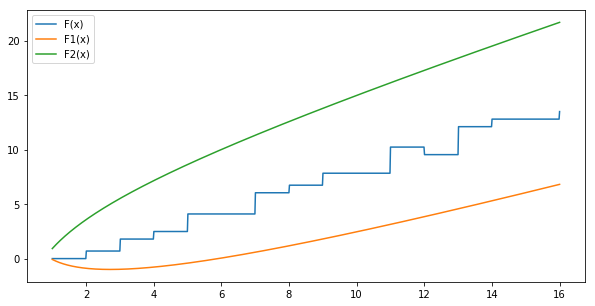

In [238]:
n=16
xres=np.linspace(1,n,1000)
f=flist(n)
psi=psilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[f[int(x)-1] for x in xres],label='F(x)')
plt.plot(xres,[fstir1(x) for x in xres],label='F1(x)')
plt.plot(xres,[fstir2(x) for x in xres],label='F2(x)')
#plt.plot(xres,xres,label='x')
#plt.savefig("fest.png", dpi=150)
plt.legend()
plt.show()

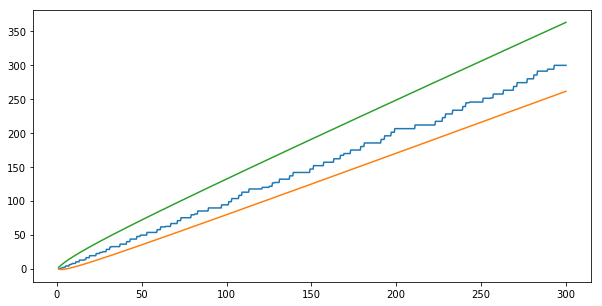

In [343]:
n=300
xres=np.linspace(1,n,1000)
f=flist(n)
psi=psilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[psi[int(x)-1] for x in xres],label='psi(x)')
plt.plot(xres,[psistir1(x) for x in xres],label='psi1(x)')
plt.plot(xres,[psistir2(x) for x in xres],label='psi2(x)')
#plt.plot(xres,xres,label='x')
#plt.legend()
#plt.savefig("psest.png", dpi=150)
plt.show()

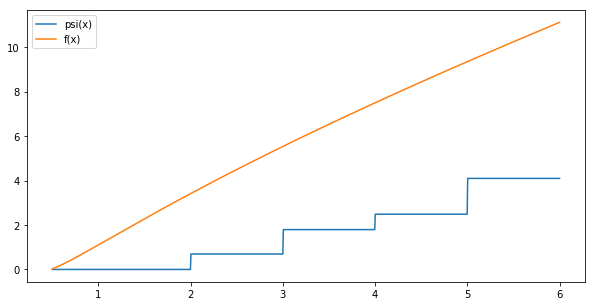

In [340]:
n=100
xres=np.linspace(.5,6,1000)
f=flist(n)
psi=psilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[psi[max(0,int(x)-1)] for x in xres],label='psi(x)')
plt.plot(xres,[ftmp(x) for x in xres],label='f(x)')
plt.legend()
#plt.savefig("psif.png", dpi=150)
plt.show()

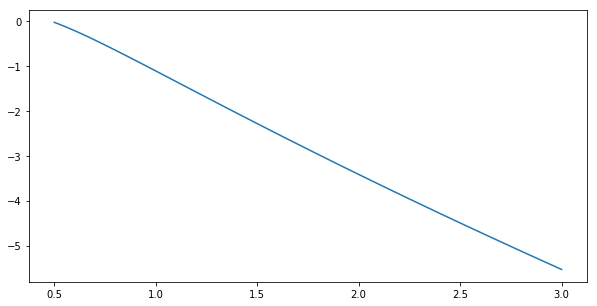

In [319]:
xres=np.linspace(.5,3,100)
plt.figure(figsize=(10,5))
plt.plot(xres,[-ftmp(x) for x in xres])
plt.show()

In [321]:
psilist(6)

[0,
 0.69314718055994529,
 1.791759469228055,
 2.4849066497880004,
 4.0943445622221004,
 4.0943445622221004]

In [327]:
np.log(2)

0.69314718055994529

In [324]:
ftmp(.5)

0.021523653843426027

In [339]:
ftmp(2)

3.4127172465246529

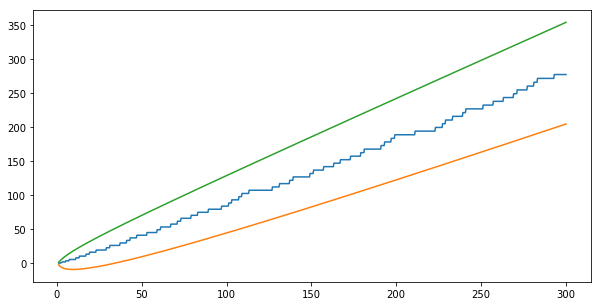

In [366]:
n=300
xres=np.linspace(1,n,1000)
f=flist(n)
theta=thetalist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[theta[int(x)-1] for x in xres],label='theta(x)')
plt.plot(xres,[thestir1(x) for x in xres],label='theta1(x)')
plt.plot(xres,[thestir2(x) for x in xres],label='theta2(x)')
#plt.plot(xres,xres,label='x')
#plt.legend()
#plt.savefig("thest.png", dpi=150)
plt.show()

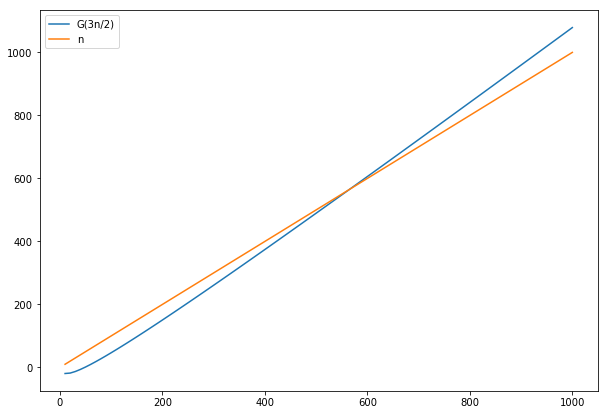

In [432]:
a=1.5
b=0
xres=np.linspace(10,1000,100)
plt.figure(figsize=(10,7))
plt.plot(xres,[berf(a*x-b) for x in xres],label='G(3n/2)')
plt.plot(xres,xres,label='n')
plt.legend()
#plt.savefig("berf32.png", dpi=150)
plt.show()

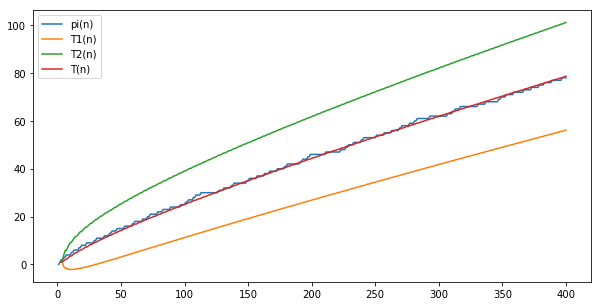

In [499]:
n=400
li2=mpmath.li(2)
xres=np.linspace(3,n,500)
c1=[cheb1(x) for x in xres]
c2=[cheb2(x) for x in xres]
plt.figure(figsize=(10,5))
plt.plot(range(1,n+1),pilist(n),label='pi(n)')
#plt.plot(xres,[x/np.log(x) for x in xres],label='x/log(x)')
plt.plot(xres,c1,label='T1(n)')
plt.plot(xres,c2,label='T2(n)')
plt.plot(xres,[.5*(c1[i]+c2[i]) for i in range(len(c1))],label='T(n)')
plt.legend()
#plt.savefig("cheb.png", dpi=150)
plt.show()

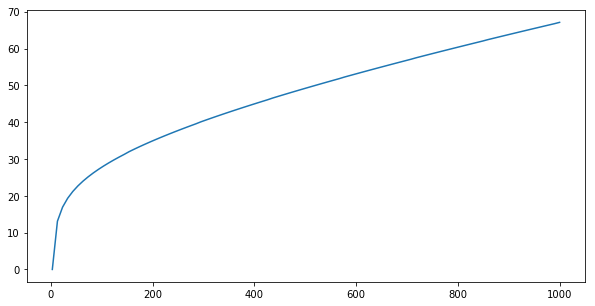

In [449]:
n=1000
li2=mpmath.li(2)
xres=np.linspace(3,n,100)
plt.figure(figsize=(10,5))
#plt.plot(range(1,n+1),pilist(n),label='pi(x)')
#plt.plot(xres,[x/np.log(x) for x in xres],label='x/log(x)')
plt.plot(xres,[cheb2(x)-cheb1(x) for x in xres])
plt.legend()
plt.show()

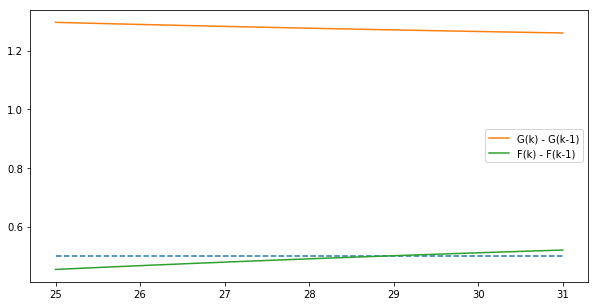

In [473]:
xres=np.linspace(25,31,100)
plt.figure(figsize=(10,5))
plt.plot(xres,[.5 for x in xres],'--')
plt.plot(xres,[thestir2(x)-thestir2(x-1) for x in xres],label='G(k) - G(k-1)')
plt.plot(xres,[thestir1(x)-thestir1(x-1) for x in xres],label='F(k) - F(k-1)')
plt.legend()
#plt.savefig("ffgg.png", dpi=150)
plt.show()

In [470]:
[Aconst,1.2*Aconst]

[0.92129202293409074, 1.1055504275209089]

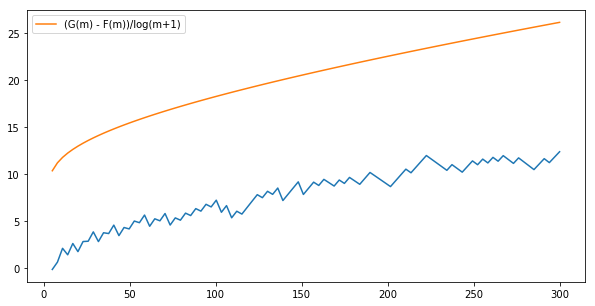

In [479]:
n=300
xres=np.linspace(5,n,100)
li2=mpmath.li(2)
beta=1.2*Aconst
pc=pilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[beta*(mpmath.li(x)-li2)-pc[int(x)-1] for x in xres])
#plt.plot(xres,[.5 for x in xres],'--')
plt.plot(xres,[(thestir2(x)-thestir1(x))/np.log(x+1) for x in xres],label='(G(m) - F(m))/log(m+1)')
plt.legend()
#plt.savefig("ffgg.png", dpi=150)
plt.show()

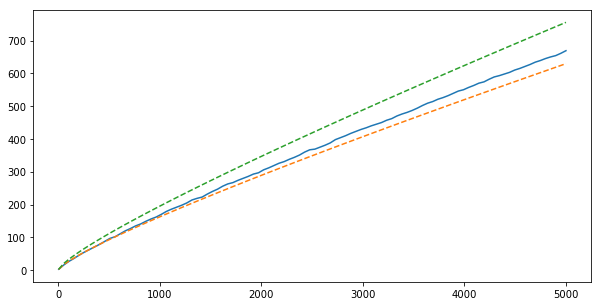

In [491]:
n=5000
xres=np.linspace(5,n,100)
li2=mpmath.li(2)
beta=1.2*Aconst
pc=pilist(n)
plt.figure(figsize=(10,5))
plt.plot(xres,[pc[int(x)-1] for x in xres])
plt.plot(xres,[Aconst*(mpmath.li(x)-li2) for x in xres],'--')
plt.plot(xres,[1.2*Aconst*(mpmath.li(x)-li2) for x in xres],'--')
plt.legend()
#plt.savefig("ffgg.png", dpi=150)
plt.show()

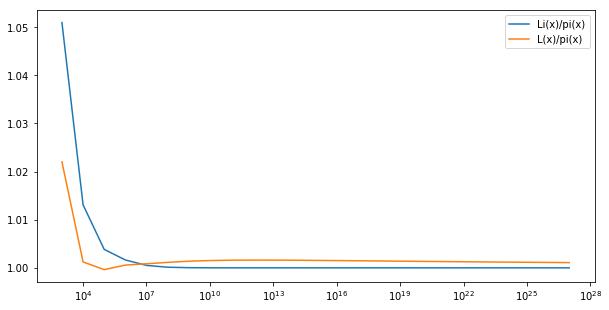

In [618]:
m0=3
m=27
xl=np.logspace(m0,m,m-m0+1)
ml=range(m0,m+1)
plt.figure(figsize=(10,5))
plt.plot(xl,[pili(10**i)/pi10[i-1] for i in ml],label='Li(x)/pi(x)')
plt.plot(xl,[pileg(10**i)/pi10[i-1] for i in ml],label='L(x)/pi(x)')
#plt.plot(ml,[pileg(10**i)-pili(10**i) for i in ml])
#plt.plot(xl,[pileg(10**i) for i in ml])
#plt.plot(xl,[pili(10**i) for i in ml])
#plt.plot(xl,pi10[0:m])
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
plt.legend()
plt.show()

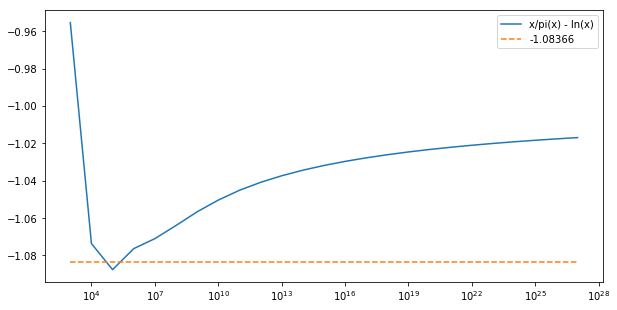

In [614]:
m0=3
m=27
ln10=math.log(10)
xl=np.logspace(m0,m,m-m0+1)
ml=range(m0,m+1)
plt.figure(figsize=(10,5))
plt.plot(xl,[float(10**i)/pi10[i-1]-i*ln10 for i in ml],label='x/pi(x) - ln(x)')
plt.plot(xl,[-1.08366 for x in xl],'--',label='-1.08366')
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
plt.legend()
plt.show()

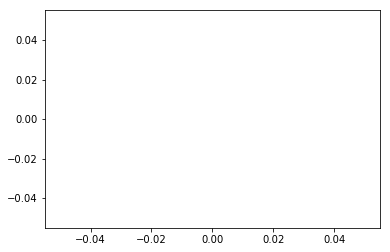

In [676]:
#The files 1d01-1d16 have 10000 lines each
#dat1=open("1d01.txt","r")
nl=[]
pl=[]
n=0
for line in dat1:
    words = line.split()
    n+=10
    nl.append(n)
    pl.append(int(words[1]))
dn=10
for k in range(2,17):
#    dat1=open("1d"+str(k).zfill(2)+".txt","r")
    for i in range(1000):
        dat1.readline()
    dn*=10
    for line in dat1:
        words = line.split()
        n+=dn
        nl.append(n)
        pl.append(int(words[1]))
#The files 1d19-1d21 have 100 lines each
dn=10**18
for k in range(19,22):
#    dat1=open("1d"+str(k)+".txt","r")
    for i in range(10):
        dat1.readline()
    dn*=10
    for line in dat1:
        words = line.split()
        n+=dn
        nl.append(n)
        pl.append(int(words[1]))
#dat=open("dat.txt","w") 
for i in range(len(nl)):
    dat.write(str(nl[i])+" "+str(pl[i])+"\n")
dat.close()
plt.plot(nl,pl)
plt.show()

In [711]:
dat=open("dat.txt","r")
nl=[]
pl=[]
for line in dat:
    words = line.split()
    nl.append(int(words[0]))
    pl.append(int(words[1]))
nl.append(10**24)
pl.append(pi10[-4])
nl.append(10**25)
pl.append(pi10[-3])
nl.append(10**26)
pl.append(pi10[-2])
nl.append(10**27)
pl.append(pi10[-1])

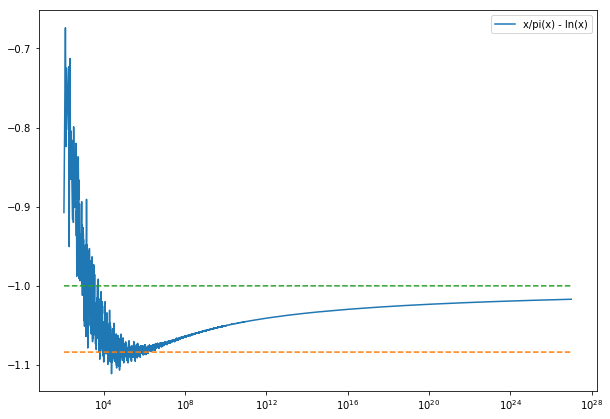

In [811]:
ii=10
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,7))
plt.plot(ml,[float(ml[i])/pim[i]-math.log(ml[i]) for i in range(len(ml))],label='x/pi(x) - ln(x)')
plt.plot(ml,[-1.08366 for n in ml],'--')
plt.plot(ml,[-1 for n in ml],'--')
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
plt.legend()
plt.savefig("alim.png", dpi=200)
plt.show()

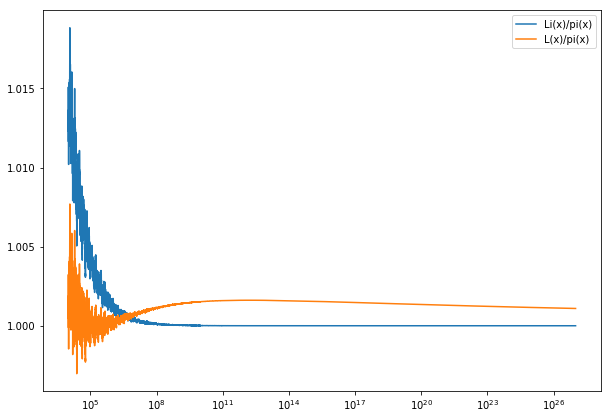

In [749]:
ii=1000
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,7))
plt.plot(ml,[pili(ml[i])/pim[i] for i in range(len(ml))],label='Li(x)/pi(x)')
plt.plot(ml,[pileg(ml[i])/pim[i] for i in range(len(ml))],label='L(x)/pi(x)')
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
#plt.savefig("lil.png", dpi=200)
plt.legend()
plt.show()

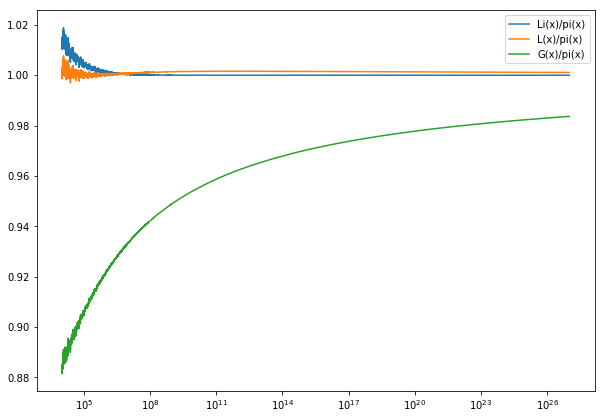

In [750]:
ii=1000
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,7))
plt.plot(ml,[pili(ml[i])/pim[i] for i in range(len(ml))],label='Li(x)/pi(x)')
plt.plot(ml,[pileg(ml[i])/pim[i] for i in range(len(ml))],label='L(x)/pi(x)')
plt.plot(ml,[pigauss(ml[i])/pim[i] for i in range(len(ml))],label='G(x)/pi(x)')
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
plt.legend()
#plt.savefig("lilg.png", dpi=200)
plt.show()

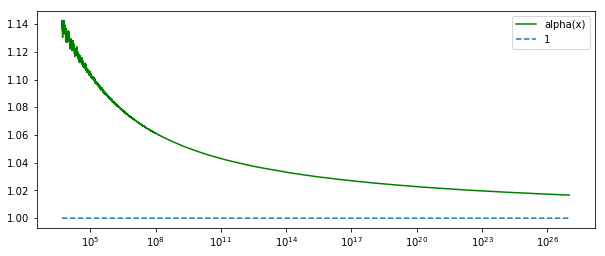

In [769]:
ii=500
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,4))
plt.plot(ml,[pim[i]/pigauss(ml[i]) for i in range(len(ml))],'g',label='alpha(x)')
plt.plot(ml,[1 for n in ml],'--',label='1')
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
plt.legend()
#plt.savefig("g1.png", dpi=200)
plt.show()

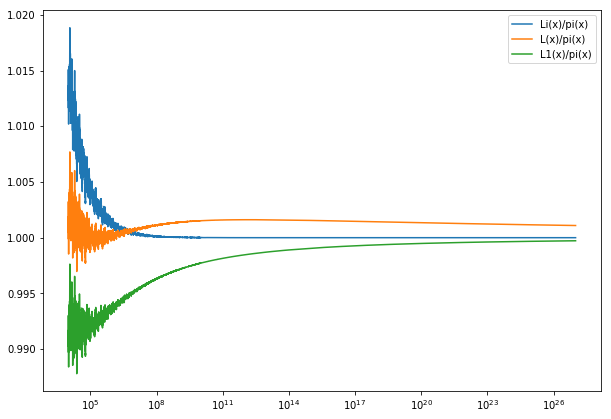

In [754]:
ii=1000
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,7))
plt.plot(ml,[pili(ml[i])/pim[i] for i in range(len(ml))],label='Li(x)/pi(x)')
plt.plot(ml,[pileg(ml[i])/pim[i] for i in range(len(ml))],label='L(x)/pi(x)')
plt.plot(ml,[pileg1(ml[i])/pim[i] for i in range(len(ml))],label='L1(x)/pi(x)')
plt.semilogx()
#plt.semilogy()
#plt.yscale('symlog', linthreshx=1000000)
plt.legend()
#plt.savefig("lil1.png", dpi=200)
plt.show()

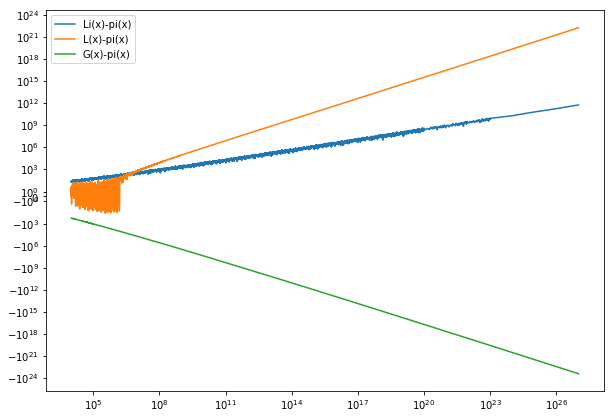

In [755]:
ii=1000
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,7))
plt.plot(ml,[pili(ml[i])-pim[i] for i in range(len(ml))],label='Li(x)-pi(x)')
plt.plot(ml,[pileg(ml[i])-pim[i] for i in range(len(ml))],label='L(x)-pi(x)')
plt.plot(ml,[pigauss(ml[i])-pim[i] for i in range(len(ml))],label='G(x)-pi(x)')
plt.semilogx()
#plt.semilogy()
plt.yscale('symlog')
plt.legend()
#plt.savefig("lilgd.png", dpi=200)
plt.show()

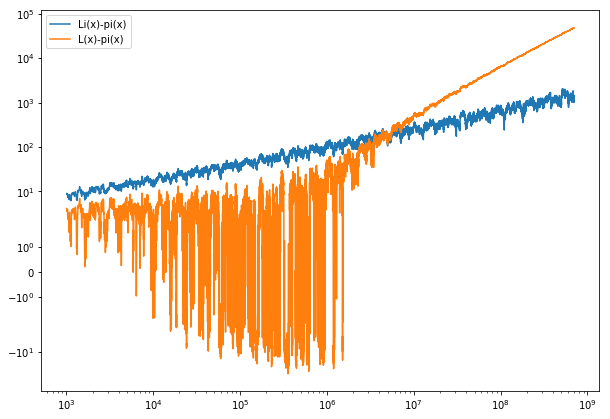

In [726]:
i1=100
i2=43000
ml=nl[i1:i2]
pim=pl[i1:i2]
plt.figure(figsize=(10,7))
plt.plot(ml,[pili(ml[i])-pim[i] for i in range(len(ml))],label='Li(x)-pi(x)')
plt.plot(ml,[pileg(ml[i])-pim[i] for i in range(len(ml))],label='L(x)-pi(x)')
plt.semilogx()
#plt.semilogy()
plt.yscale('symlog')
plt.legend()
#plt.savefig("lild.png", dpi=200)
plt.show()

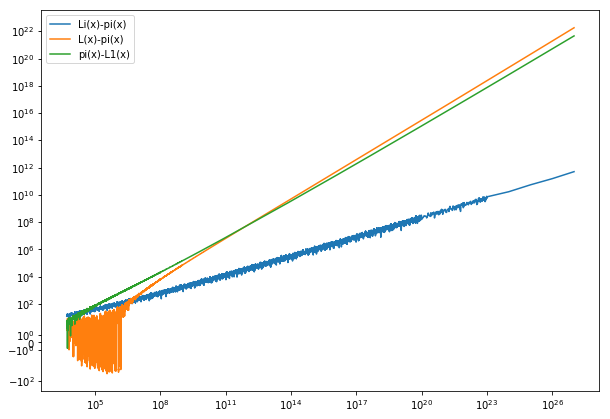

In [758]:
ii=500
ml=nl[ii:]
pim=pl[ii:]
plt.figure(figsize=(10,7))
plt.plot(ml,[pili(ml[i])-pim[i] for i in range(len(ml))],label='Li(x)-pi(x)')
plt.plot(ml,[pileg(ml[i])-pim[i] for i in range(len(ml))],label='L(x)-pi(x)')
plt.plot(ml,[pim[i]-pileg1(ml[i]) for i in range(len(ml))],label='pi(x)-L1(x)')
plt.semilogx()
#plt.semilogy()
plt.yscale('symlog')
plt.legend()
#plt.savefig("lil1d.png", dpi=200)
plt.show()

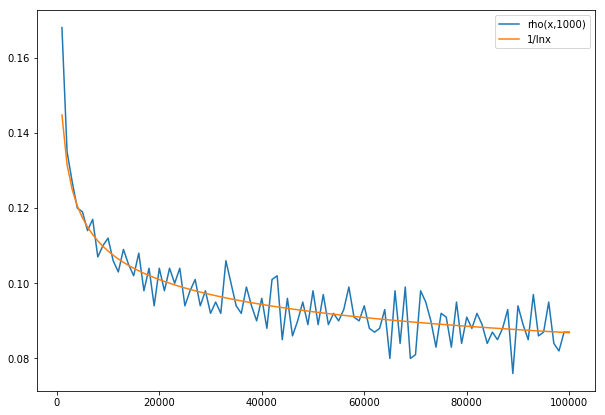

In [802]:
dp=[]
dn=[]
dp.append(.001*pl[99])
dn.append(1000)
for i in range(100,10000,100):
    dp.append(.001*(pl[i+99]-pl[i-1]))
    dn.append(i*10+1000)
plt.figure(figsize=(10,7))
plt.plot(dn,dp,label='rho(x,1000)')
plt.plot(dn,[1/math.log(dn[i]) for i in range(len(dn))],label='1/lnx')
#plt.semilogy()
plt.legend()
#plt.savefig("density.png", dpi=200)
plt.show()

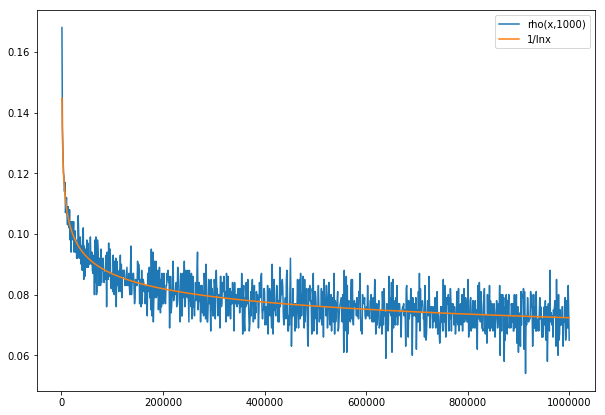

In [803]:
i=10000
x=100000
for j in range(1000-100):
    i+=10
    x+=1000
    dp.append(.001*(pl[i-1]-pl[i-11]))
    dn.append(x)
plt.figure(figsize=(10,7))
plt.plot(dn,dp,label='rho(x,1000)')
plt.plot(dn,[1/math.log(dn[i]) for i in range(len(dn))],label='1/lnx')
plt.legend()
#plt.savefig("density1.png", dpi=200)
plt.show()

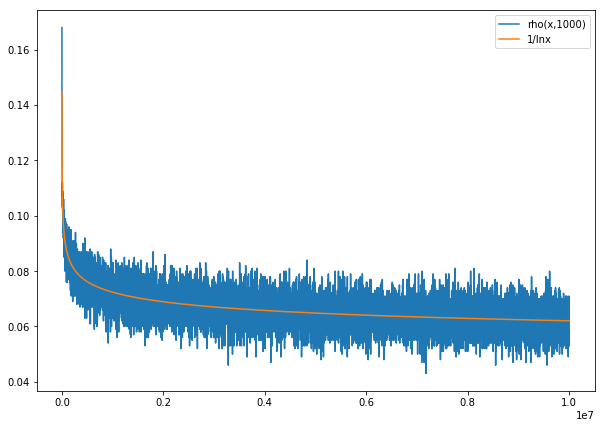

In [804]:
i=10000+10000-1000
x=1000000
for j in range(10000-1000):
    i+=1
    x+=1000
    dp.append(.001*(pl[i-1]-pl[i-2]))
    dn.append(x)
plt.figure(figsize=(10,7))
plt.plot(dn,dp,label='rho(x,1000)')
plt.plot(dn,[1/math.log(dn[i]) for i in range(len(dn))],label='1/lnx')
plt.legend()
#plt.savefig("density1.png", dpi=200)
plt.show()

In [812]:
Aconst

0.92129202293409074

In [833]:
def vonmang(x,n):
    p = x-math.log(2*math.pi)-.5*math.log(1-1./(x*x))
    l = math.log(x)
    for i in range(1,n+1):
        rho = mpmath.zetazero(i)
        s = rho.real
        t = rho.imag
        p -= 2*(x**s)*(s*math.cos(t*l)+t*math.sin(t*l))/(s*s+t*t)
    return p

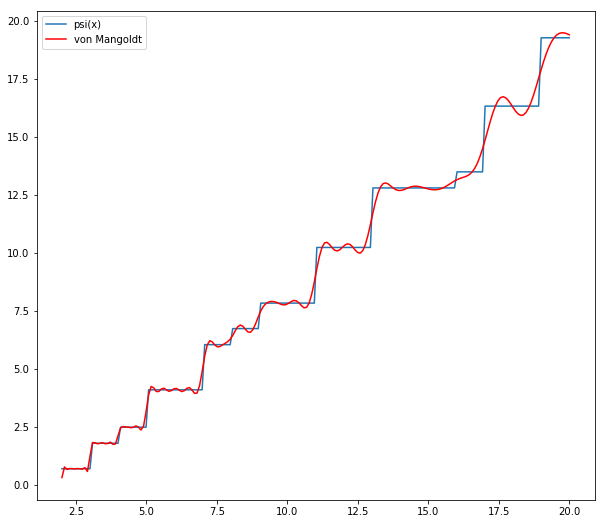

In [840]:
n=20
m=23
xres=np.linspace(2,n,200)
psi=psilist(n)
plt.figure(figsize=(10,9))
plt.plot(xres,[psi[int(x-1)] for x in xres],label='psi(x)')
plt.plot(xres,[vonmang(x,m) for x in xres],'r',label='von Mangoldt')
plt.legend()
plt.savefig("vonmangoldt.png", dpi=200)
plt.show()